<a href="https://colab.research.google.com/github/Bmdhia/sales_predictions/blob/main/Project_1_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
filename = '/content/drive/MyDrive/sales_predictions_2023.csv'
df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#1
df.shape

(8523, 12)

In [8]:
#2
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
#3
df.duplicated().sum()

0

In [10]:
#4
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#5 i droped item wight because the the number of missing values in [Item_Weight] is less then 2% of all values
df.drop(columns='Item_Weight', inplace=True)

In [12]:
df['Outlet_Size'].fillna('Missing', inplace=True)

In [13]:
#6
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
data_types = df.dtypes


In [16]:
str_cols = data_types[data_types=="object"]


In [17]:
str_cols = str_cols.index

In [18]:
for col in str_cols:
  print(f"{col}:")
  print(df[col].value_counts(dropna=False))
  print("\n\n")

Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT01

In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF',"Low Fat")

In [20]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat',"Low Fat")

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg',"Regular")

In [22]:
for column in df.columns:
    if df[column].dtype.kind in 'biufc':
       print(column,df[column].min().round(0))


Item_Visibility 0.0
Item_MRP 31.0
Outlet_Establishment_Year 1985
Item_Outlet_Sales 33.0


In [23]:
for column in df.columns:
    if df[column].dtype.kind in 'biufc':
       print(column,df[column].max().round(0))


Item_Visibility 0.0
Item_MRP 267.0
Outlet_Establishment_Year 2009
Item_Outlet_Sales 13087.0


In [24]:
for column in df.columns:
    if df[column].dtype.kind in 'biufc':
       print(column,df[column].mean().round(0))


Item_Visibility 0.0
Item_MRP 141.0
Outlet_Establishment_Year 1998.0
Item_Outlet_Sales 2181.0


In [25]:
des = df.describe()
print('min :')
des.iloc[3]

min :


Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
Name: min, dtype: float64

In [26]:
print('max :')
des.iloc[7]

max :


Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
Name: max, dtype: float64

In [27]:
print('mean :')
des.iloc[1]

mean :


Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
Name: mean, dtype: float64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


<Axes: >

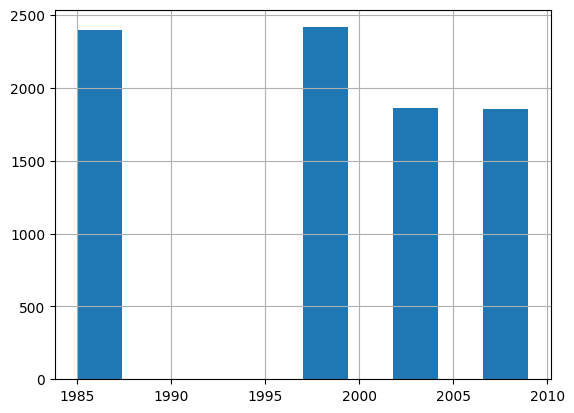

In [30]:
df['Outlet_Establishment_Year'].hist()

❌

<ipython-input-33-49402959770a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)


<Axes: >

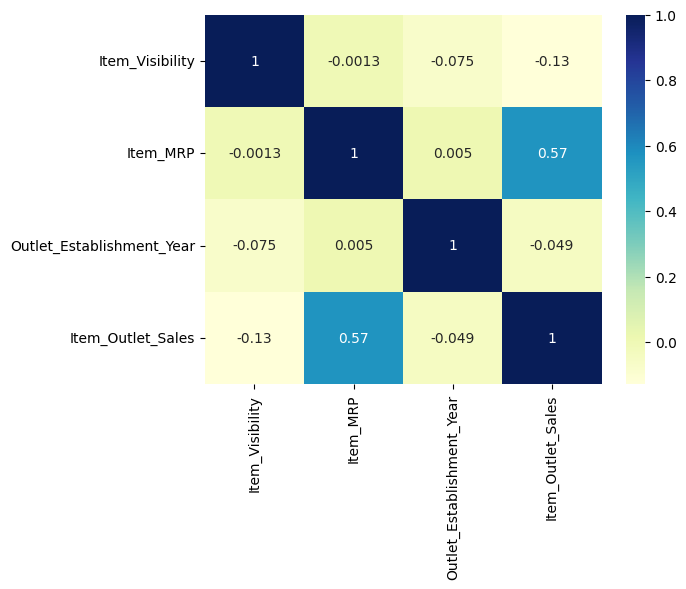

In [33]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shad

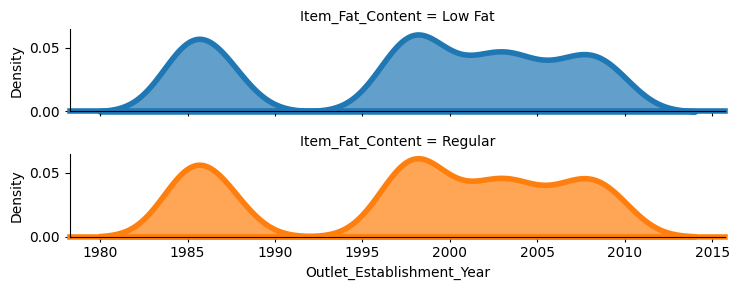

In [34]:
rp = sns.FacetGrid(df, row="Item_Fat_Content", hue="Item_Fat_Content", aspect=5, height=1.50)

rp.map(sns.kdeplot, 'Outlet_Establishment_Year', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)

rp.map(plt.axhline, y=0, lw=4, clip_on=False)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shad

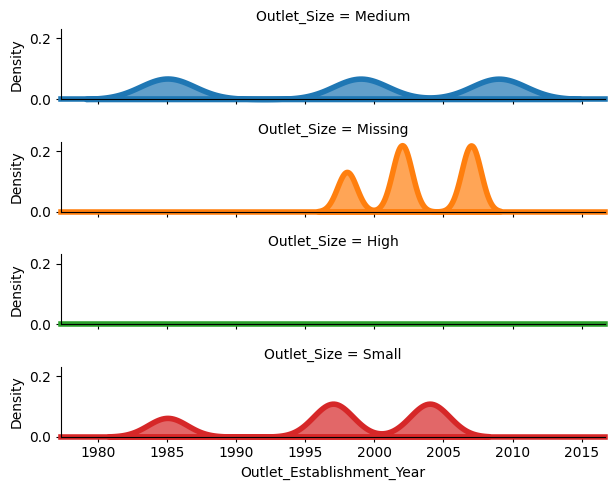

In [35]:
rp = sns.FacetGrid(df, row="Outlet_Size", hue="Outlet_Size", aspect=5, height=1.25)

rp.map(sns.kdeplot, 'Outlet_Establishment_Year', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)

rp.map(plt.axhline, y=0, lw=4, clip_on=False)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Count'>

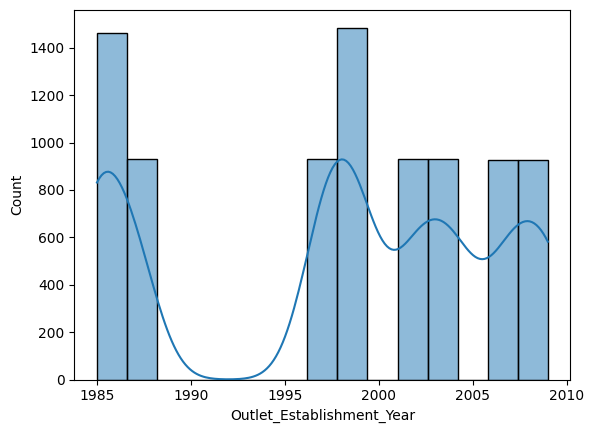

In [38]:
sns.histplot(data=df, x="Outlet_Establishment_Year", kde=True)

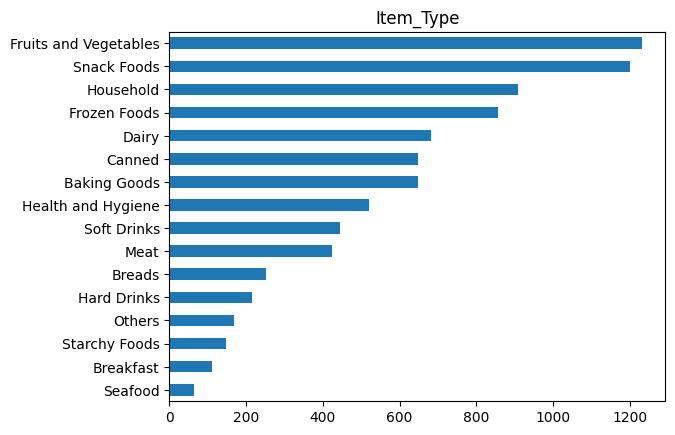

In [47]:
df['Item_Type'].value_counts(ascending=True).plot(kind = 'barh');
plt.title('Item_Type')
plt.show();

<ipython-input-41-f2bdb2cd4316>:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['Outlet_Establishment_Year'], shade=True, bw=0.5, color="olive")
<ipython-input-41-f2bdb2cd4316>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Outlet_Establishment_Year'], shade=True, bw=0.5, color="olive")


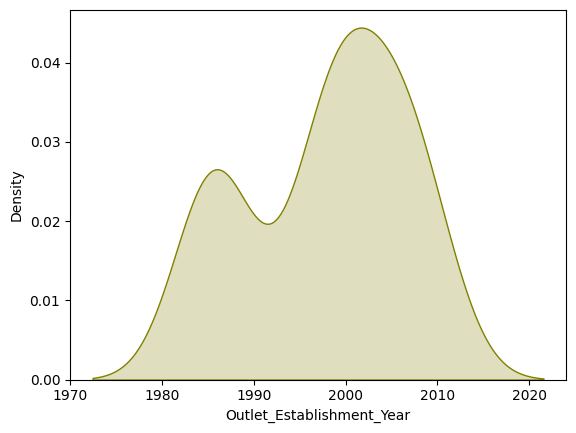

In [41]:
sns.kdeplot(df['Outlet_Establishment_Year'], shade=True, bw=0.5, color="olive")
plt.show()

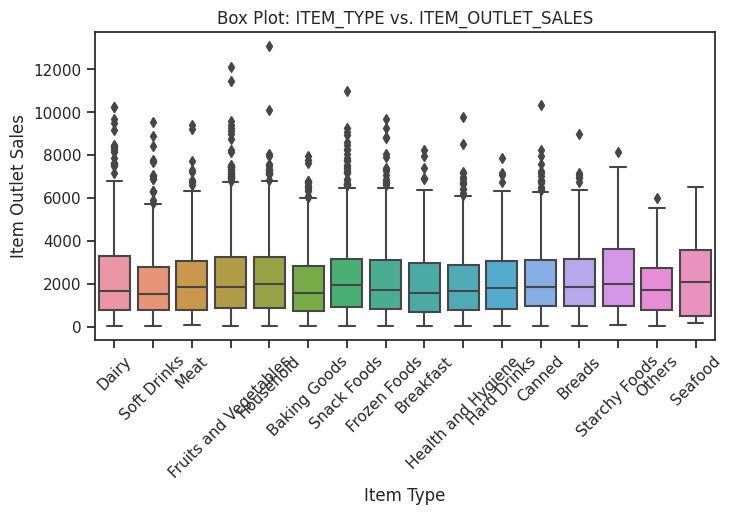

In [48]:
sns.set(style="ticks")

# Create the box plot
plt.figure(figsize=(8, 4))  # Adjust the figure size as per your preference
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
plt.title('Box Plot: ITEM_TYPE vs. ITEM_OUTLET_SALES')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

We can compare the distribution of sales across different item types. This can help identify any variations in sales performance based on item types.